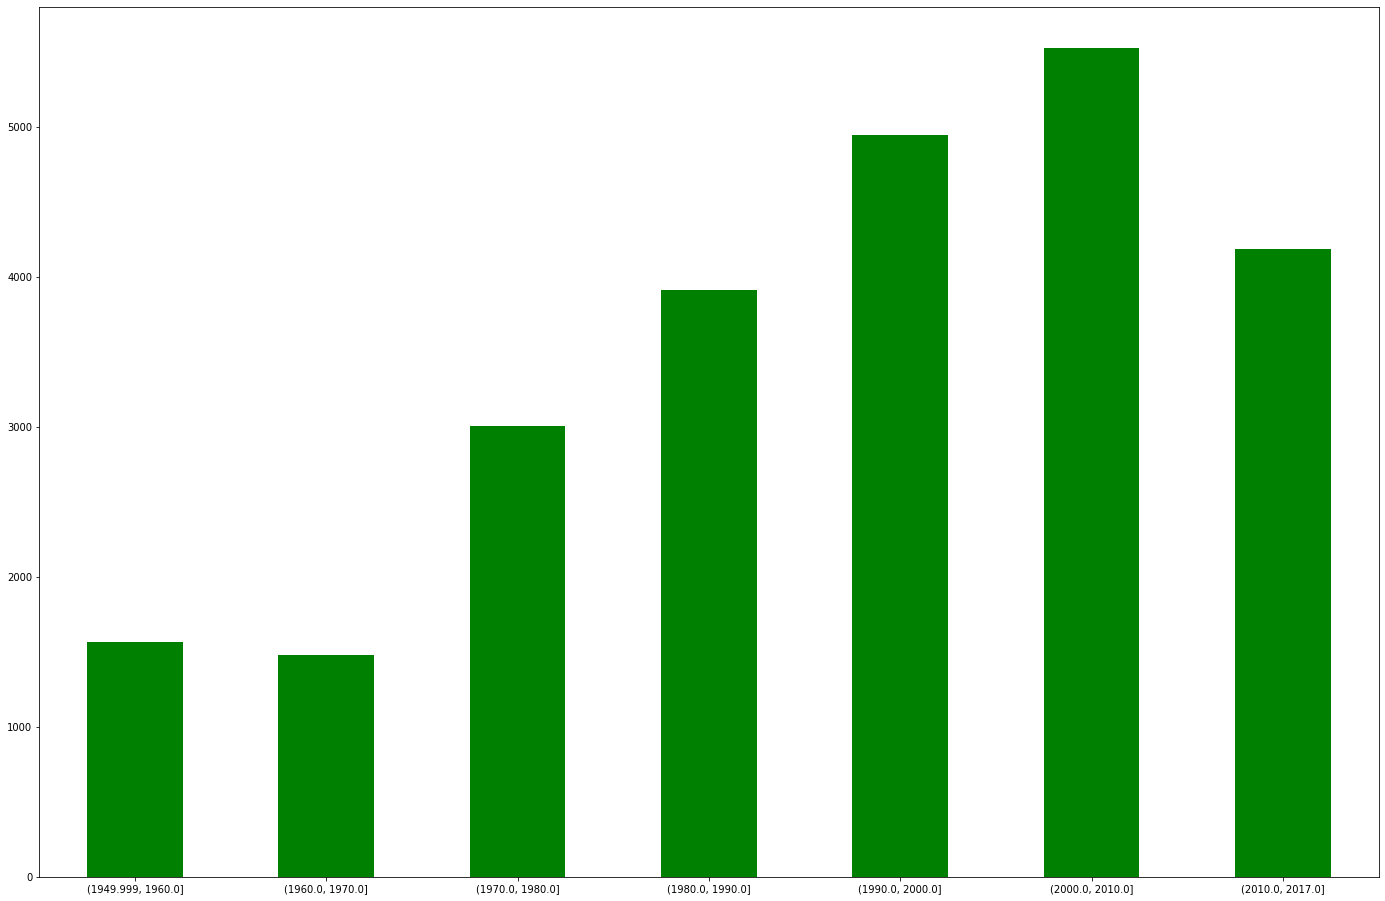

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

SS = pd.read_csv("Seasons_Stats.csv")

bi = pd.cut(SS['Year'], bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2017], include_lowest=True)
temp = bi.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(24,16))
plt.show()


##As can be seen inside of the graphs above, there is a big difference in those inside the NBA, as it stands throughout the years those playing having gone up tremendously.

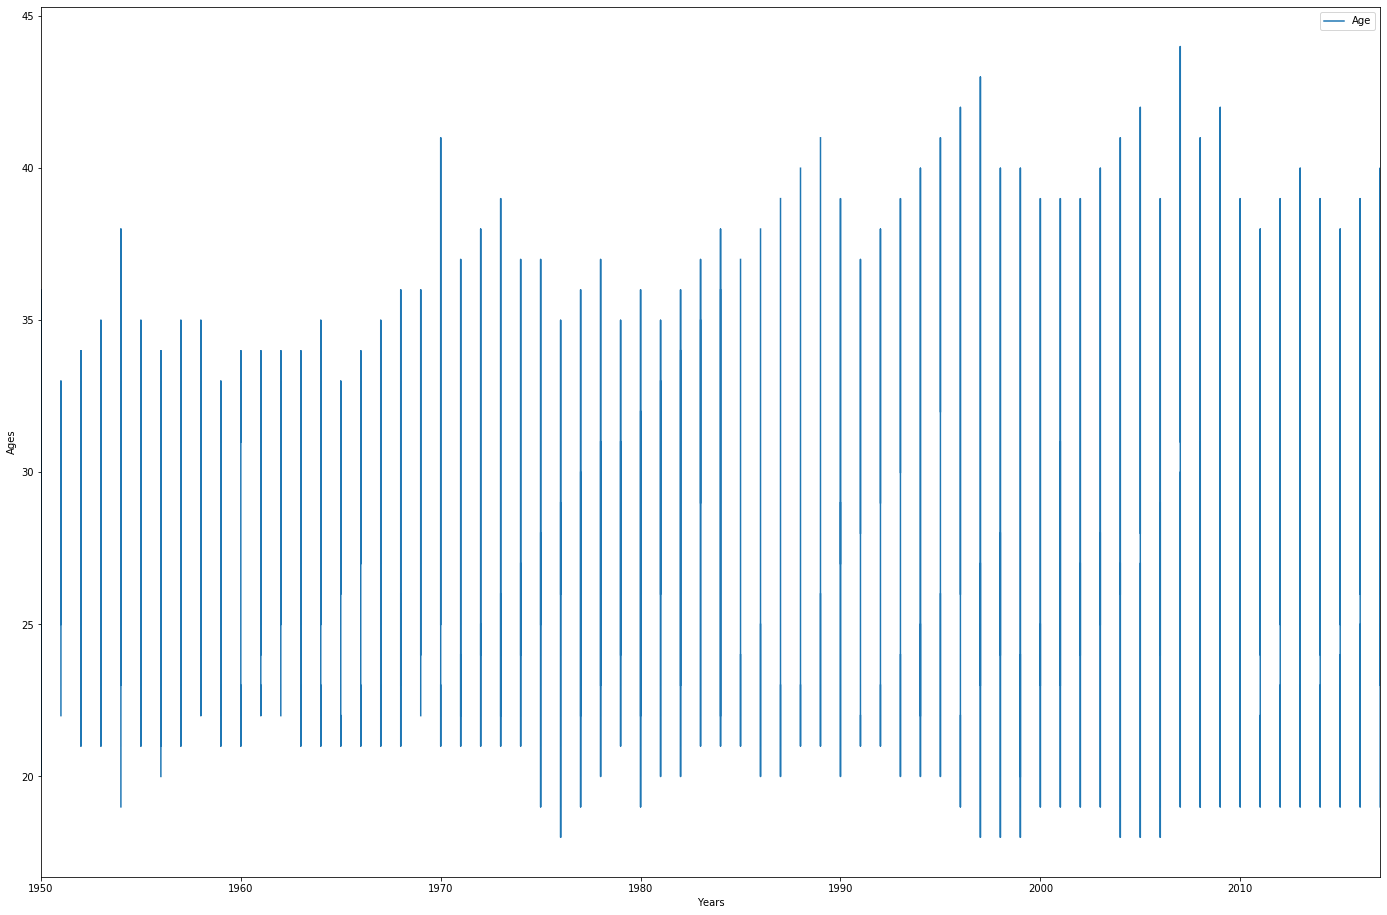

In [2]:
plotted2 = SS.plot(x='Year', y='Age', figsize=(24,16))
plotted2.set(xlabel = "Years", ylabel = "Ages")
plt.show()

The above plot shows that as the years went on, and people continued playing basketball from 1950 to 2017, the average age of players actually got lower for the most part, the youngest players in the league today younger than the ones 60 years ago, and the oldest players even more so, the ages still seen playing basketball today having increased to the point of outliers like the one in 1970 becoming common place in modern day.

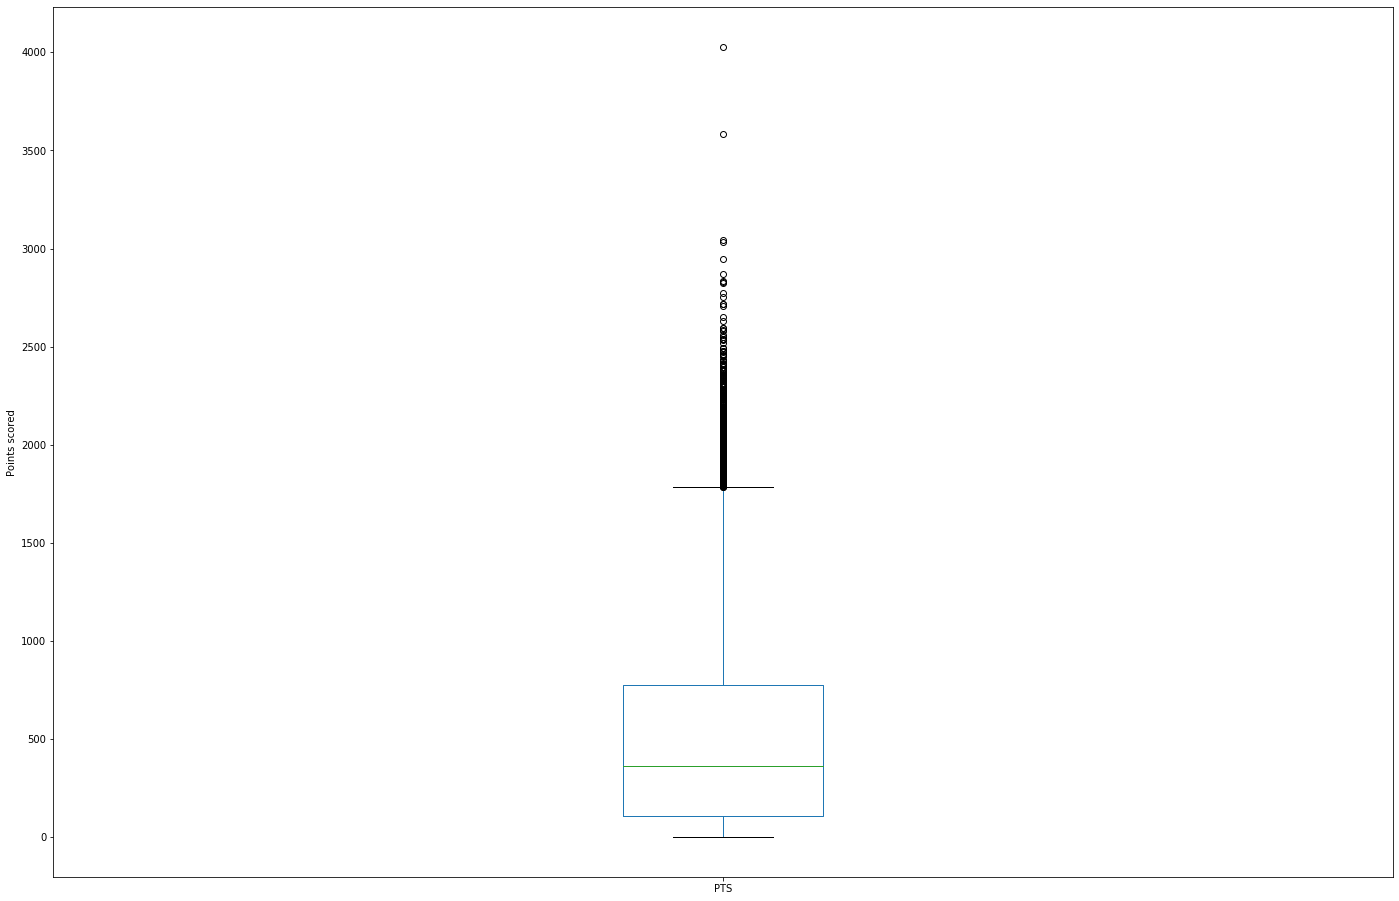

In [3]:
plotted3 = SS.plot.box(y='PTS', figsize=(24,16))
plotted3.set(ylabel = "Points scored")
plt.show()

As shown in the above box plot, most of the time the points are within the roughly 200 to 700 range per year per person, occasionally lower, but also according to the chart, possessing a number of outliers, some far crazier than others.

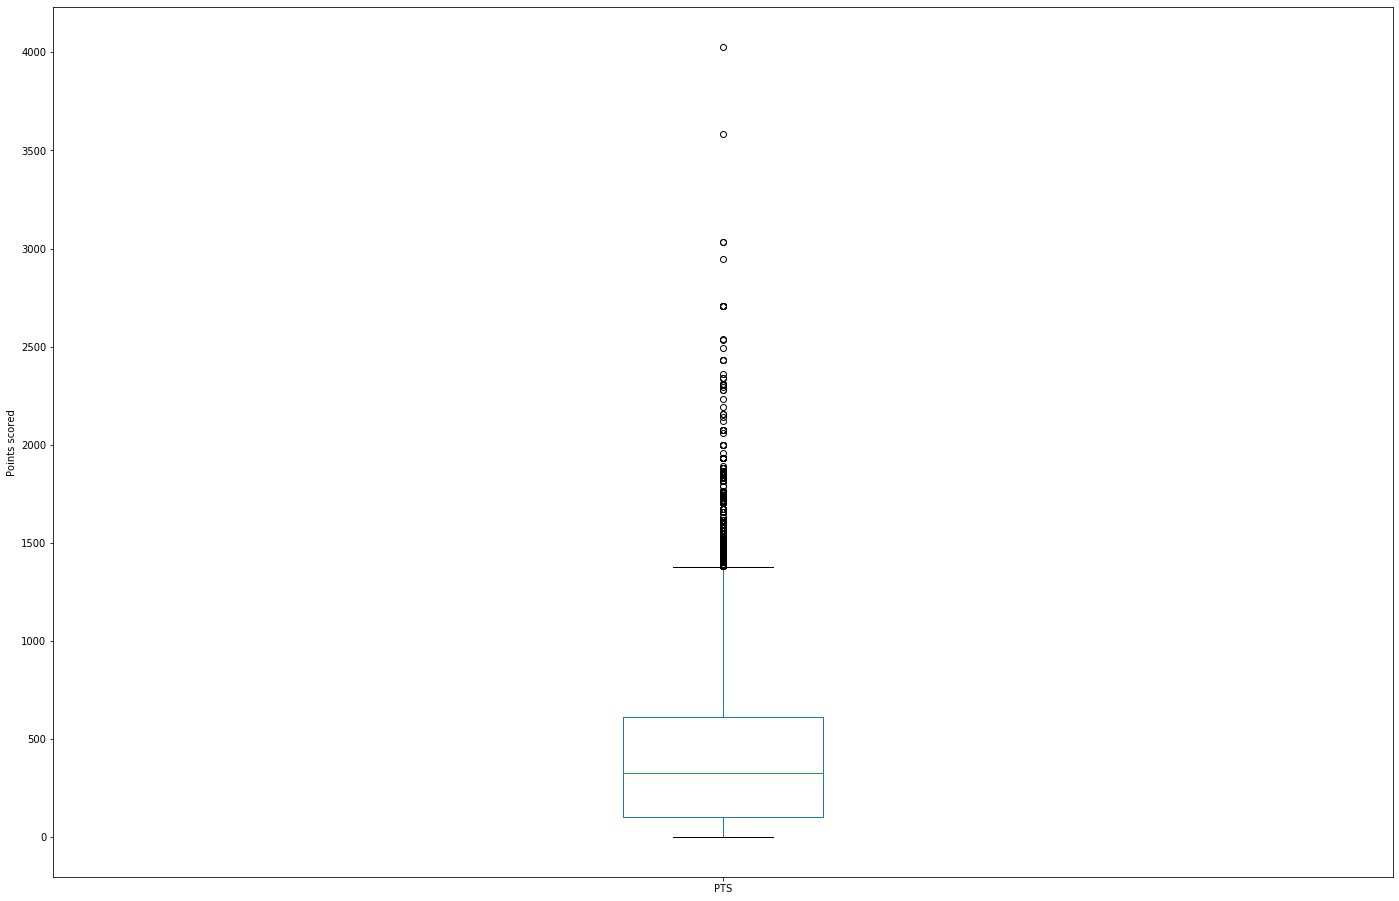

In [4]:
tot = SS.PTS.where(SS.Year < 2010)
tot = tot[tot.dropna(axis='rows')]
plotted4 = tot.plot.box(y='PTS', figsize=(24,16))
plotted4.set(ylabel = "Points scored")
plt.show()

This a graph to show that the more recent games that have been played infact show a smaller amount of points scored. In truth, this is not a very fair comparison, as since many people haven't had the same time in the game as others, it seems that others from before had a slightly bigger impact on the dimensions fo the scores.

In [5]:
SS.drop(columns= {'Unnamed: 0', 'Year', 'Pos', 'Age','Tm', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%'}, inplace=True)
SS = SS.dropna(axis=0, how='any')
SS = SS.set_index('Player')
SS = SS.groupby(['Player']).agg({'G': 'sum', 'PTS': 'sum'})
SS.head(n = 10)

,G,PTS
Player,,
A.C. Green,1361.0,12928.0
A.J. Bramlett,8.0,8.0
A.J. English,151.0,1502.0
A.J. Guyton,80.0,442.0
A.J. Hammons,22.0,48.0
A.J. Price,287.0,1656.0
A.J. Wynder,6.0,12.0
A.W. Holt,6.0,4.0
Aaron Brooks,797.0,7839.0


I brought the set up of the dataset down to games and points in order to better show relationships, then grouped them so as to add the duplicate players scores and games together, showing the number of games and points under the player's name instead of the player according to year or team.

In [6]:
SS['PTS']/SS['G']

Player
A.C. Green             9.498898
A.J. Bramlett          1.000000
A.J. English           9.947020
A.J. Guyton            5.525000
A.J. Hammons           2.181818
                        ...    
Zelmo Beaty*          15.977193
Zendon Hamilton        4.184932
Zoran Dragic           1.750000
Zoran Planinic         3.790541
Zydrunas Ilgauskas    13.020166
Length: 3921, dtype: float64

This shows the direct ratio of points to games played, showing those who scored more points than they played games, and those who did not. This is a way of checking who is the 'best' player at the time, or place in which they are placed.

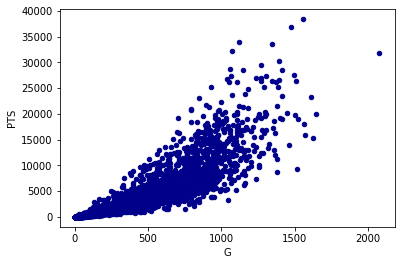

In [7]:
SS.plot.scatter(x='G',y='PTS', c='DarkBlue')

This scatter plot shows an unusually large set of differences based on the number of games played to the scores recieved. While there is a trend to a degree, there are also a large number of outliers in which the points rise quickly, or in a few cases, the points rise almost not at all. I imagine that this is in part because there are more defensive players on the teams to handle less scoreing, but are good at defence, as well as star scorers of which make a very large number of points in a much shorter period of games.

In [8]:
from sklearn.linear_model import LinearRegression

Lin = LinearRegression()

print(SS.dtypes)

X_te = SS.copy(deep=True)
X_te = SS[["G"]]
X_te.head(2)
y_te = SS["PTS"]

Lin.fit(X=X_te, y=y_te)
print(Lin.coef_,Lin.intercept_)

Y_predict = Lin.predict(X=X_te)

G      float64
PTS    float64
dtype: object
[12.63527994] -830.3755884377274


In [9]:
output=pd.DataFrame(data={"Player":SS.index,"LinRegMod":Y_predict})
output.head(10)

,Player,LinRegMod
0,A.C. Green,16366.240404
1,A.J. Bramlett,-729.293349
2,A.J. English,1077.551682
3,A.J. Guyton,180.446806
4,A.J. Hammons,-552.399430
5,A.J. Price,2795.949753
6,A.J. Wynder,-754.563909
7,A.W. Holt,-754.563909
8,Aaron Brooks,9239.942520
9,Aaron Gordon,1759.856798


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# pipeline and fit to training set
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor()
)
pipeline.fit(X=X_te, y=y_te)
    
scores = cross_val_score(pipeline, X=X_te, y=y_te, cv=5)  # cv refers to number of cross-validation cuts
scores

array([0.76597718, 0.77187127, 0.78978346, 0.77587828, 0.80736781])

In [11]:
Y_predict = pipeline.predict(X=X_te)
output=pd.DataFrame(data={"Player":SS.index,"LinRegMod":Y_predict}) 
output.head(10)

,Player,LinRegMod
0,A.C. Green,16590.029020
1,A.J. Bramlett,-753.737114
2,A.J. English,1079.343859
3,A.J. Guyton,169.212747
4,A.J. Hammons,-574.274641
5,A.J. Price,2822.693596
6,A.J. Wynder,-779.374610
7,A.W. Holt,-779.374610
8,Aaron Brooks,9360.255110
9,Aaron Gordon,1771.556255


As we had done before in a lab, namely lab 7, I tried two diffent modelings, both giving slightly different results, and pertaining as to the data, the first giving results that look a bit tighter towards 0.